# Задание

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, нужно провести разведывательный анализ данных и составьте отчёт по его результатам.

# 1. Подключаем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np

from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from scipy.stats import ttest_ind

from itertools import combinations

In [2]:
# для вывода большего количества строк
pd.set_option('display.max_rows', 50)

# для вывода большего количества колонок
pd.set_option('display.max_columns', 50)

# 2. Загружаем данные

In [3]:
data = pd.read_csv('stud_math.csv')

# 3. Первчиный анализ данных и подготовка

Рассмотрим имеющиеся данные

In [4]:
display(data)
display(data.info())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

None

- Всего в данных **395** учеников 
- Каждая запись имеет **30** признаков
- Целевая переменная **score**

Название всех признаков кроме **"studytime, granular"** представленны в удобном для работы виде. Изменим название признака **"studytime, granular"** на **studytime**

In [5]:
data.rename(columns={'studytime, granular':'studytime_granular'}, inplace=True)

Так же приведем название всех признаков к нижнему регистру

In [6]:
data = data.rename(columns=lambda x: x.lower())

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

В данных **13** числовых и **17** строковых признаков

# 4. Обработка признаков

В датасете **28** признаков, требущих анализа. Для удобства напишем функции первичного анализа данных

In [8]:
def column_info(data_column, hist_name='None'):
    # Опеределяем тип данных признака и на основе этого выбираем как с ним работать
    if data_column.dtype == 'int64' or data_column.dtype == 'float64':
        
        #Выводим общие показатели
        display(data_column.describe())
        # Считаем пропуски в данных
        print('Пропущенных значений: {}' .format(data_column[data_column.isnull() == True].size),
              '\nПроцент пропущенных данных: {}%' .format(round(data_column[data_column.isnull() == True].size*100/395)))
        
        # Ищем выбросы, для этого строим график
        # У большей части признаков количество уникальных значений составлят не больше 5 (кроме score и absences)
        # поэтому для удобства я буду строить bar графики
        sns.countplot(x=data_column, data=data)
        
        
    else:
        # Считаем пропуски в данных
        print('Пропущенных значений: {}' .format(data_column[data_column.isnull() == True].size),
              '\nПроцент пропущенных данных: {}%' .format(round(data_column[data_column.isnull() == True].size*100/395)))
        print('Уникальные значения: {}' .format(data_column.unique()), 
              '\nКоличество уникальных значений: \n{}'.format(data_column.value_counts()))
        
        # строим график соотношения уникальных значений друг относительно друга
        sns.countplot(x=data_column, data=data)

Рассмотрим поближе каждый признак по-отдельности

## №1 school

Аббревиатура школы, в которой учится ученик

Пропущенных значений: 0 
Процент пропущенных данных: 0%
Уникальные значения: ['GP' 'MS'] 
Количество уникальных значений: 
GP    349
MS     46
Name: school, dtype: int64


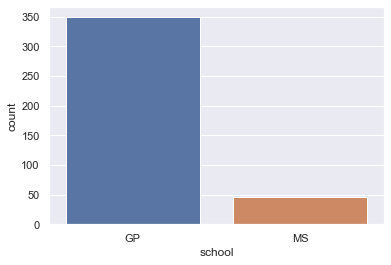

In [9]:
column_info(data.school)

В данных всего **2** школы. Представителей школы GP намного больше чем MS. Пока с этмии данными больше ничего сделать нельзя

## №2 sex

Пол ученика

Пропущенных значений: 0 
Процент пропущенных данных: 0%
Уникальные значения: ['F' 'M'] 
Количество уникальных значений: 
F    208
M    187
Name: sex, dtype: int64


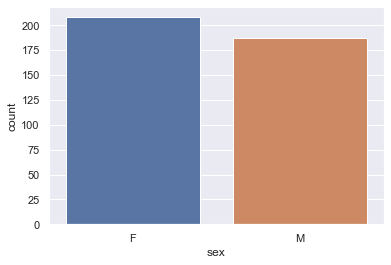

In [10]:
column_info(data.sex)

В данных **2** пола ( логично:) ). **F** - женский, **М** - мужской. Женщин и мужчин примерно поровну. Пока с этмии данными больше ничего сделать нельзя

# №3 age

Возраст учеников от 15 до 22 лет

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

Пропущенных значений: 0 
Процент пропущенных данных: 0%


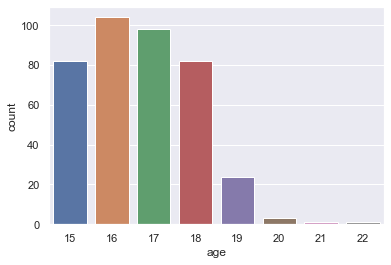

In [11]:
column_info(data.age, 'age')

Средний возраст учащихся **16** лет. Выбросов нет

Посмотрим на соотношение пола и возраста

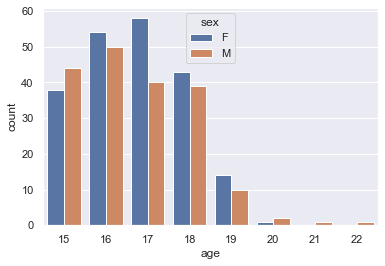

In [12]:
sns.countplot(x='age', data=data, hue='sex')

Пока с этмии данными больше ничего сделать нельзя

## №4 address

Тип адреса ученика (**U** - городской, **R** - за городом)

Пропущенных значений: 17 
Процент пропущенных данных: 4%
Уникальные значения: ['U' nan 'R'] 
Количество уникальных значений: 
U    295
R     83
Name: address, dtype: int64


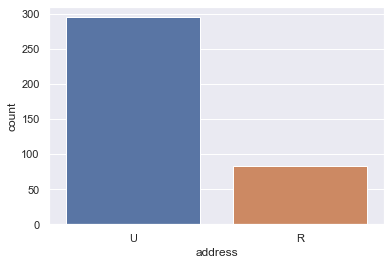

In [13]:
column_info(data.address)

Так как процент пропуска небольшой (**4%**) и дети из города преобладают, то заменим пропущенные данные на данные **U** (дети из города)

In [14]:
data.address = data.address.apply(lambda x: 'U' if pd.isnull(x) else x)

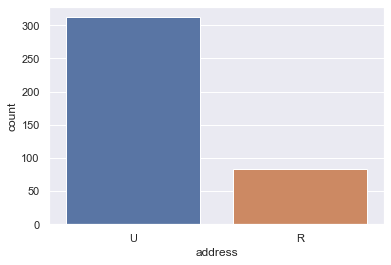

In [15]:
sns.countplot(x='address', data=data)

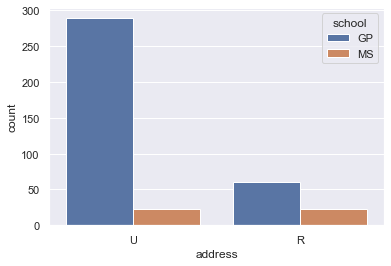

In [16]:
sns.countplot(x='address', data=data, hue='school')

Из данного графика можно сделать вывод, что родители из города предпочитают отдавать своих детей в школу **GP**. Возможно это связано с тем, где расположенны школы. **GP** может находится ближе к центру города, а **MS** дальше от центра или вообще за городом. Или это может быть связано с благосостоянием семьие. Школа MS может быть престижнее, а следовательно дороже, чем школа **GP** из-за чего не каждая семья может позволить себе отдать ребенка на обучение в школу **MS**. Пока конкретные выводы сделать сложно. Нужно дальше анализировать данные

## №5 famsize

Размер семьи (**LE3** - меньше или равно 3, **GT3** - больше 3)

Пропущенных значений: 27 
Процент пропущенных данных: 7%
Уникальные значения: [nan 'GT3' 'LE3'] 
Количество уникальных значений: 
GT3    261
LE3    107
Name: famsize, dtype: int64


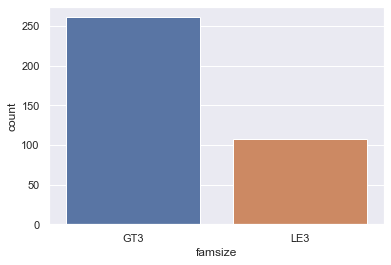

In [17]:
column_info(data.famsize)

В данных **27** пропусков. Семьи состоящие более чем из **3** человек преобладают более чем в 2 раза. Пропущенных данных всего **7%**. Так как GT3 семьи преобладают, заменим пропуски на **GT3**

In [18]:
data.famsize = data.famsize.apply(lambda x: 'GT3' if pd.isnull(x) else x)

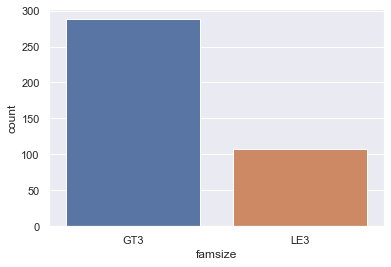

In [19]:
sns.countplot(x='famsize', data=data)

Посмотрим где проживают семьи

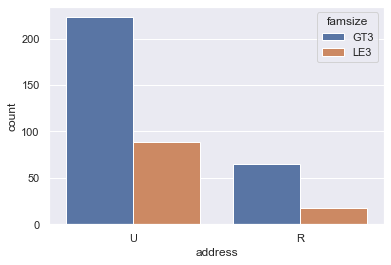

In [20]:
sns.countplot(x='address', data=data, hue='famsize')

Из графика видно, что семьи состоящие более чем из **3** и более человек преобладают как среди городских так и среди тех, кто живет за городом

Посмотрим какую школу предпочитают семьи

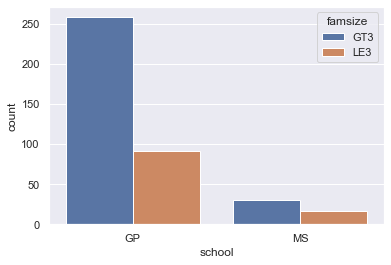

In [21]:
sns.countplot(x='school', data=data, hue='famsize')

Из графика видно, что и семьи **GT3** и семьи **LE3** предпочитают отдавать своих детей в школу **GP**. Как я уже писал ранее это может быть связано с тем, что школа **MS** более престижная, а следовательно более дорогая из-за чего не каждая семья может отдать на обучание туда своего ребенка, а тем более если их больше одного

## №6 pstatus

Статус совместного жилья родителей (**Т** - живут вместе, **А** - раздельно)

Пропущенных значений: 45 
Процент пропущенных данных: 11%
Уникальные значения: ['A' nan 'T'] 
Количество уникальных значений: 
T    314
A     36
Name: pstatus, dtype: int64


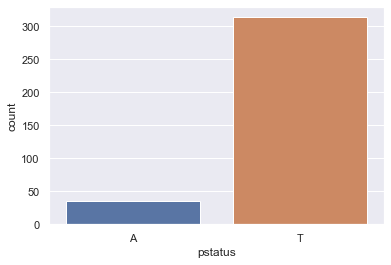

In [22]:
column_info(data.pstatus)

Всего имеются данные о **395** учениках.Из них у **314** учеников родители живут вместе и у **36** раздельно. О оставшихся **45** мы ничего не знаем. Судя по имеющимся данным, доля учеников, родители которых проживают отдельно, составляет **10%**, из чего я делаю вывод, что большая часть семей живет вместе, поэтому заполним пропуски значением **T**.

In [23]:
data.pstatus = data.pstatus.fillna('T')

## №7 medu

Образование матери (**0** - нет, **1** - 4 класса, **2** - 5-9 классов, **3** - среднее специально или 11 классов, **4** - высшее)

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

Пропущенных значений: 3 
Процент пропущенных данных: 1%


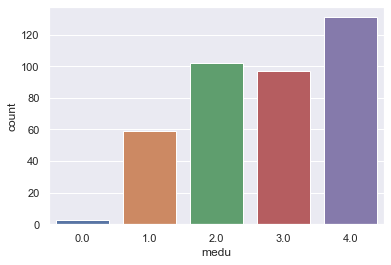

In [24]:
column_info(data.medu, 'medu')

Выбросов нет

Так как пропуска всего **3**, то просто заполним их медианным значением по данному столбцу

In [25]:
data.medu.median()

3.0

In [26]:
data.medu = data.medu.fillna(3)

## №8 fedu

Образование отца (**0** - нет, **1** - 4 класса, **2** - 5-9 классов, **3** - среднее специально или 11 классов, **4** - высшее)

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

Пропущенных значений: 24 
Процент пропущенных данных: 6%


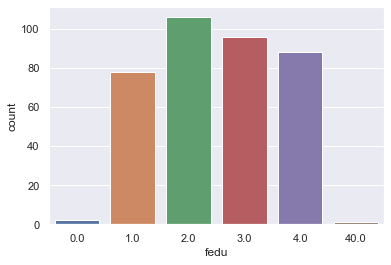

In [27]:
column_info(data.fedu, 'fedu')

В описании сказано, что признак может принимать значение от **0** до **4**. Из данных, полученых выше, делаем вывод, что максимальное значения **40** является выбросом. Возможно это просто ошибка и вместо **40** должно быть значение **4**, или это значение попало сюда из другого столбца. Проверим сколько таких выбросов

In [28]:
data.fedu[data.fedu > 4]

11    40.0
Name: fedu, dtype: float64

Только одно значание. Сделаем предположение, что это все таки ошибка при записи и тут должна быть **4**

In [29]:
data.fedu = data.fedu.replace({40:4})

Теперь избавимся от пропусков. Пропущенных данных **7%**. Заменим их медианным значением

In [30]:
data.fedu.median()

2.0

In [31]:
data.fedu = data.fedu.fillna(2)

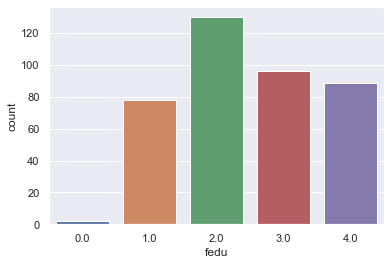

In [32]:
sns.countplot(x='fedu', data=data)

*--UPDATE--*

Я решил создать новый признак **pedu** (parents education), который объединяет в себе оба признака **fedu** и **medu**.

- **0** - у обоих родителей нет образования (**0** или **1**)
- **1** - у кого-то из родитилей хотя бы среднее неполное образование (**2**)
- **2** - у кого-то из родитилей хотя бы среднее полное образование (**3**)
- **3** - у кого-то из родитилей высшее (**4**)
- **4** - у обоих родитилей высшее образование (**4**)

In [33]:
def create_pedu(row):
    if row['fedu'] == 4 and row['medu'] == 4:
        return 4
    elif row['fedu'] <= 1 and row['medu'] <= 1:
        return 0
    elif row['fedu'] <= 2 and row['medu'] <= 2:
        return 1
    elif row['fedu'] <= 3 and row['medu'] <= 3:
        return 2
    elif row['fedu'] <= 4 or row['medu'] <= 4:
        return 3
    
data['pedu'] = data.apply(create_pedu, axis=1)

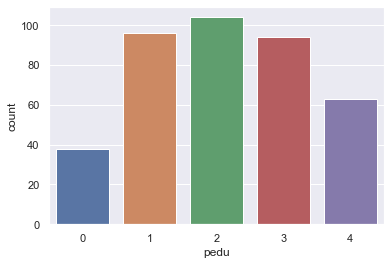

In [34]:
sns.countplot(x='pedu', data=data)

Теперь признаки **fedu** и **medu** можно удалить

In [35]:
data = data.drop(['fedu', 'medu'], axis=1)

## №9 mjob

Работа матери (**teacher** - учитель, **health** - сфреа здравоохранения, **services** - гос. служба, **at home** - не работает, **other** - другое)

Пропущенных значений: 19 
Процент пропущенных данных: 5%
Уникальные значения: ['at_home' 'health' 'other' 'services' 'teacher' nan] 
Количество уникальных значений: 
other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64


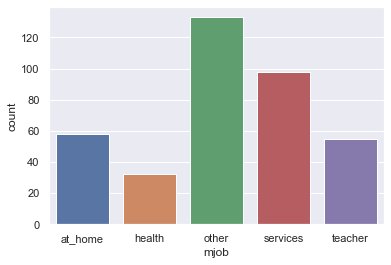

In [36]:
column_info(data.mjob)

В данном случае **5%** пропусков. Заполним их значением **other**, так как в данном случае сложно выбрать какую-то конекретную профессию

In [37]:
data.mjob = data.mjob.fillna('other')

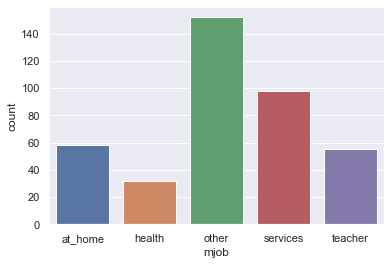

In [38]:
sns.countplot(x='mjob', data=data)

## №10 fjob

Работа отца (**teacher** - учитель, **health** - сфреа здравоохранения, **services** - гос. служба, **at home** - не работает, **other** - другое)

Пропущенных значений: 36 
Процент пропущенных данных: 9%
Уникальные значения: ['teacher' 'other' nan 'health' 'services' 'at_home'] 
Количество уникальных значений: 
other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64


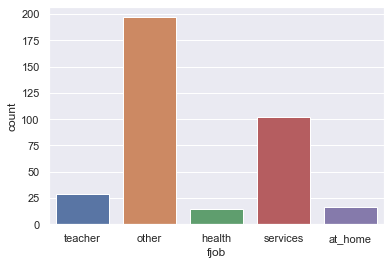

In [39]:
column_info(data.fjob)

Так же как и в предыдущем случаи заполним пропуски значением **other**

In [40]:
data.fjob = data.fjob.fillna('other')

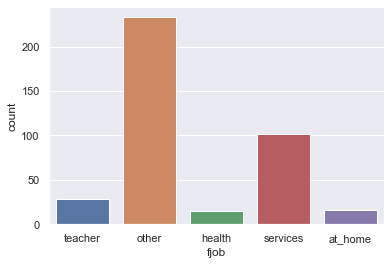

In [41]:
sns.countplot(x='fjob', data=data)

## №11 reason

Причина выбора школы (**home** - близость к дому, **reputation** - репутация школы, **course** - образовательная программа, **other** - другое)

Пропущенных значений: 17 
Процент пропущенных данных: 4%
Уникальные значения: ['course' 'other' 'home' 'reputation' nan] 
Количество уникальных значений: 
course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


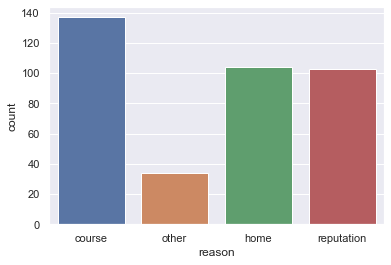

In [42]:
column_info(data.reason)

Так как в данном признаке есть категория **home** обозначающая близость к дому, то предлагаю взглянуть на признак **traveltime**

In [43]:
data.traveltime[pd.isna(data['reason'])==True]

33     1.0
63     1.0
73     1.0
77     1.0
112    NaN
137    NaN
138    1.0
140    2.0
185    1.0
186    1.0
196    1.0
263    1.0
335    1.0
363    1.0
373    1.0
382    2.0
394    1.0
Name: traveltime, dtype: float64

Из полученных данных видно, что почти у всех пропущенных значений признака **reason** школая находиться рядом с домом (<15 мин). Сделаю предположение, причина выбора школы была близость к дому. Конечно это не точные данные и возможно родители кого-то из данных учеников выбирали школу по другим причинам, но шанс того, что я угадаю, поставив вместо **NaN** значение **home**, выше, чем напримем, просто заполню все пропуски модой, средним значением или **other**

In [44]:
data.reason = data.reason.fillna('home')

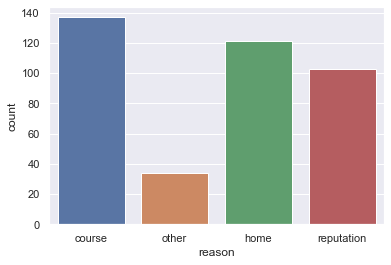

In [45]:
sns.countplot(x='reason', data=data)

## №12 guardian

Опекун (**mother** - мать, **father** - отец, **other** - другое)

Пропущенных значений: 31 
Процент пропущенных данных: 8%
Уникальные значения: ['mother' 'father' 'other' nan] 
Количество уникальных значений: 
mother    250
father     86
other      28
Name: guardian, dtype: int64


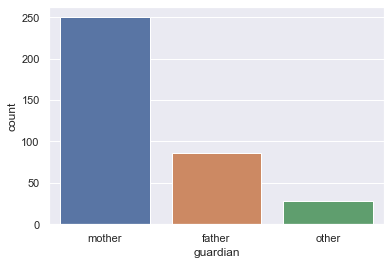

In [46]:
column_info(data.guardian)

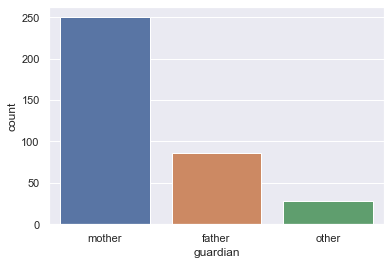

In [47]:
sns.countplot(x='guardian', data=data)

Судя по тому, что в большенстве семей опекуном является мать, делаю вывод, что семьи в которых опекун мать являються полноценными семьями или в этих семьях из родителей только мать. В семьях где отец указан опекуном, это семьи в которых из родителй только отец. Другие семья, это либо семьи в которых опекунами являются бабушка или дедушка или другие члены семьи или это приемные семьи. Скорее всего большая часть пропущенных данных - это полноценные семьи, т.е. заполним пропуски значением **mother**

In [48]:
data.guardian = data.guardian.fillna('mother')

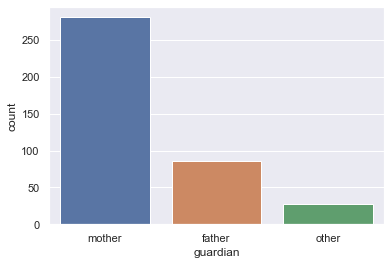

In [49]:
sns.countplot(x='guardian', data=data)

## №13 traveltime

Время в пути до школы (**1** - <15 мин., **2** - 15-30 мин., **3** - 30-60 мин., **4** - >60 мин.)

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

Пропущенных значений: 28 
Процент пропущенных данных: 7%


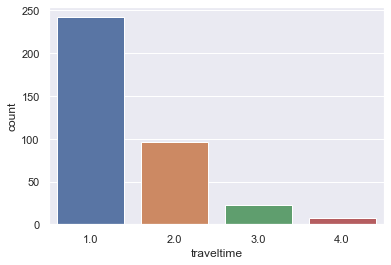

In [50]:
column_info(data.traveltime, 'traveltime')

Выбросов нет

Заполним пропуски медианным значением

In [51]:
data.traveltime.median()

1.0

In [52]:
data.traveltime = data.traveltime.fillna(1)

## №14 studytime

Время на учёбу помимо школы в неделю (**1** - <2 часов, **2** - 2-5 часов, **3** - 5-10 часов, **4** - >10 часов)

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

Пропущенных значений: 7 
Процент пропущенных данных: 2%


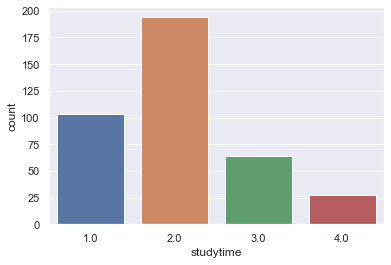

In [53]:
column_info(data.studytime, 'studytime')

Заполним пропуски медианным значением

In [54]:
data.studytime.median()

2.0

In [55]:
data.studytime = data.studytime.fillna(2)

## №15 failures

количество внеучебных неудач (**n**, если 1<=n<3, иначе **0**)

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

Пропущенных значений: 22 
Процент пропущенных данных: 6%


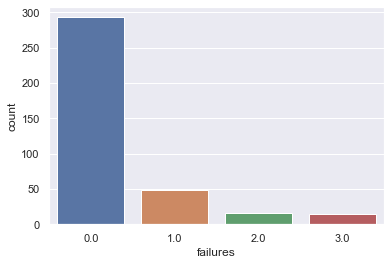

In [56]:
column_info(data.failures, 'failures')

В данном случае мы видим, что доля учащихся у которых отсутствуют внеучебные неудачи сильно преобладает над остальными, поэтому просто заполню пропуски значением **0**

In [57]:
data.failures = data.failures.fillna(0)

## №16 schoolsup

Дополнительная образовательная поддержка (**yes** или **no**)

Пропущенных значений: 9 
Процент пропущенных данных: 2%
Уникальные значения: ['yes' 'no' nan] 
Количество уникальных значений: 
no     335
yes     51
Name: schoolsup, dtype: int64


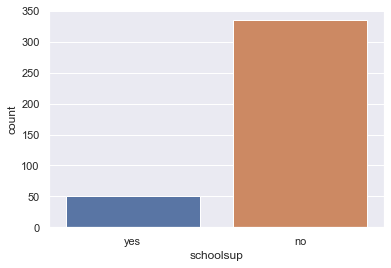

In [58]:
column_info(data.schoolsup)

В данном случаи заполним пропуски модой

In [59]:
data.schoolsup = data.schoolsup.fillna('no')

## №17 famsup

Семейная образовательная поддержка (**yes** или **no**)

Пропущенных значений: 39 
Процент пропущенных данных: 10%
Уникальные значения: ['no' 'yes' nan] 
Количество уникальных значений: 
yes    219
no     137
Name: famsup, dtype: int64


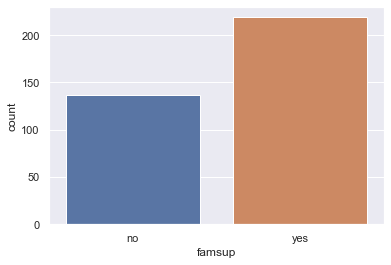

In [60]:
column_info(data.famsup)

В данный момент сложно сказать как лучше обработать пропуски. Удалять нехорошо, слишком много пропуском (**10%** от всех данных). Заполнить одним из двух значений пока тоже не представляется возможным, так как разница между ними не такая большая, чтобы сказать какая из них преобладает и характерна для большенства случаев. Возможно после более глубукого анализа всех данных можно будет сделать какой-то вывод. Так же можно создать третье уникальное значение **other** и добавить их туда, но в данном случаи это кажеться неумстным, так как из описания признака можно однозначно дать ответ либо **yes**, либо **no**. Вернусь к этому вопросу позже.

*---------UPDATE---------*

Решил взгялнуть на образование родителей и попробовать на основе этого заполнить пропуски

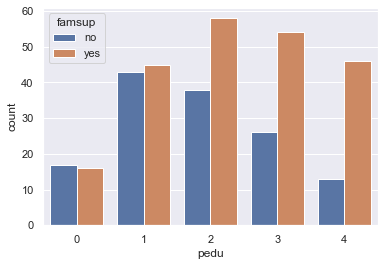

In [61]:
sns.countplot(x='pedu', data=data, hue='famsup')

По графикам видно, что чем лучше обозование родителей, тем больше вероятность того, что они помогают своим детям в учебе.
Сделаю следующим образом: если образование родитилей **3** и более, то заполню пропуски значением **yes**

In [62]:
data.famsup[(data.pedu>=3) & (pd.isna(data['famsup'])==True)]

22     NaN
28     NaN
38     NaN
51     NaN
52     NaN
59     NaN
98     NaN
167    NaN
169    NaN
180    NaN
232    NaN
267    NaN
268    NaN
279    NaN
302    NaN
328    NaN
335    NaN
363    NaN
Name: famsup, dtype: object

In [63]:
for i in data.famsup[(data.pedu >= 3) & (pd.isna(data['famsup'])==True)].index:
    data.at[i,'famsup'] = 'yes'

Взглянем сколько пропусков осталось

In [64]:
data.famsup.isnull().value_counts()

False    374
True      21
Name: famsup, dtype: int64

Все еще достаточно много, чтобы просто удалить эти данные. Расширим условие. Пусть будет значние **yes** если у родителей образование **2** или выше.

In [65]:
data.famsup[(data.pedu>=2) & (pd.isna(data['famsup'])==True)]

17     NaN
33     NaN
146    NaN
222    NaN
246    NaN
271    NaN
276    NaN
313    NaN
Name: famsup, dtype: object

In [66]:
for i in data.famsup[(data.pedu >= 2) & (pd.isna(data['famsup'])==True)].index:
    data.at[i,'famsup'] = 'yes'

In [67]:
data.famsup.isnull().value_counts()

False    382
True      13
Name: famsup, dtype: int64

Удалим оставшиеся данные

In [68]:
for i in data.famsup[pd.isna(data['famsup'])==True].index:
    data['famsup'].drop(i)

## №18 paid

Дополнительные платные занятия по математике (**yes** или **no**)

Пропущенных значений: 40 
Процент пропущенных данных: 10%
Уникальные значения: ['no' nan 'yes'] 
Количество уникальных значений: 
no     200
yes    155
Name: paid, dtype: int64


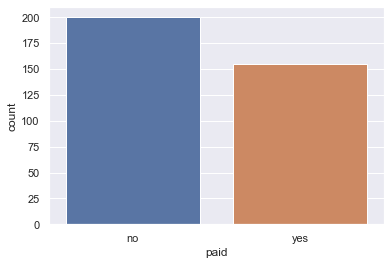

In [69]:
column_info(data.paid)

На данный момент больше ничего нельзя сделать с этими данными. Оставлю пока так. Возможно анализ номинативных переменных покажет, что данный признак не особо влияет на целевую переменную. Если все же влияет, то при построеннии модели можно будет попробовать разные методы заполнения пропусков. Или просто удалить пропуски.

## №19 activities

Дополнительные внеучебные занятия (**yes** или **no**)

Пропущенных значений: 14 
Процент пропущенных данных: 4%
Уникальные значения: ['no' 'yes' nan] 
Количество уникальных значений: 
yes    195
no     186
Name: activities, dtype: int64


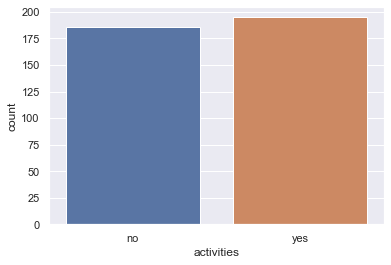

In [70]:
column_info(data.activities)

Попрбую сравнить этот признак с признаками **goout** и **freetime**

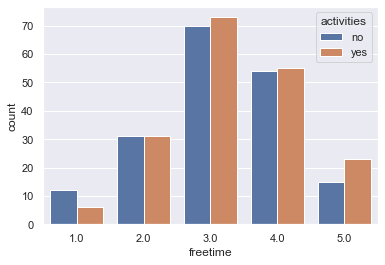

In [71]:
sns.countplot(x='freetime', data=data, hue='activities')

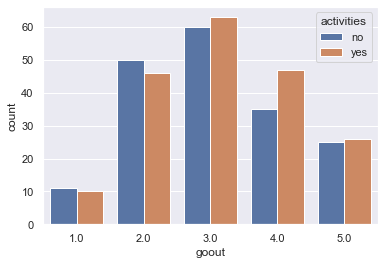

In [72]:
sns.countplot(x='goout', data=data, hue='activities')

Мое предположение не подтвердилось. Я думал сделать какие то выводы на основе того, сколько у учеников свободного времени и сколько времени они проводят с друзьями, но из графиков видно, что все показатели распределены практически поровну, поэтому  нет возможность сделать какие то определенные выводы

Ситуация аналогина предыдущему признаку. Пока оставлю как есть.

## №20 nursery

посещал детский сад (**yes** или **no**)

Пропущенных значений: 16 
Процент пропущенных данных: 4%
Уникальные значения: ['yes' 'no' nan] 
Количество уникальных значений: 
yes    300
no      79
Name: nursery, dtype: int64


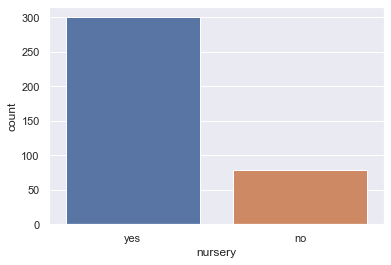

In [73]:
column_info(data.nursery)

Пропусков всего **4%**. В данном случаи можно сказать, что те кто ходил в детский сад преобладают над теми, кто не ходил. Так как пропусков не так много, просто заполним иих значением **yes**

In [74]:
data.nursery = data.nursery.fillna('yes')

## №21 higher

хочет получить высшее образование (**yes** или **no**)

Пропущенных значений: 20 
Процент пропущенных данных: 5%
Уникальные значения: ['yes' nan 'no'] 
Количество уникальных значений: 
yes    356
no      19
Name: higher, dtype: int64


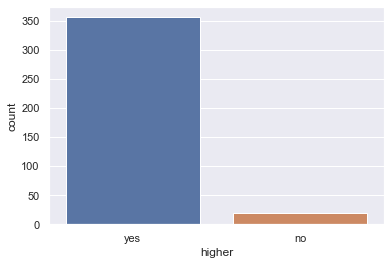

In [75]:
column_info(data.higher)

Поступим с пропусками аналогично предыдущему случаю

In [76]:
data.higher = data.higher.fillna('yes')

## №22 internet

наличие интернета дома (**yes** или **no**)

Пропущенных значений: 34 
Процент пропущенных данных: 9%
Уникальные значения: [nan 'yes' 'no'] 
Количество уникальных значений: 
yes    305
no      56
Name: internet, dtype: int64


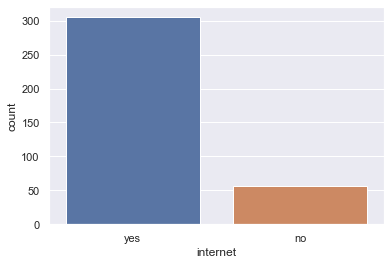

In [77]:
column_info(data.internet)

Аналогичная ситуация с пропусками

In [78]:
data.internet = data.internet.fillna('yes')

## №23 romantic

в романтических отношениях (**yes** или **no**)

Пропущенных значений: 31 
Процент пропущенных данных: 8%
Уникальные значения: ['no' nan 'yes'] 
Количество уникальных значений: 
no     240
yes    124
Name: romantic, dtype: int64


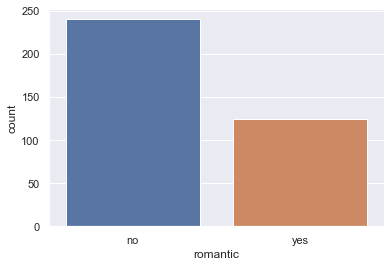

In [79]:
column_info(data.romantic)

Взглянем насколько возраст влияет на наличие романтических отношений

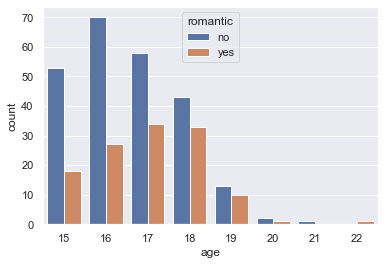

In [80]:
sns.countplot(x='age', data=data, hue='romantic')

Из графика видно, что чем младше ученик, тем более вероятно, что он не состоит в романтичесих отношениях.

Заполню пропуски следующим образом: 15-17 лет сделаю предположение, что отношений **нет**. После этого посмотрю сколько осталось незаполненных значений

In [81]:
data.romantic.isna().value_counts()

False    364
True      31
Name: romantic, dtype: int64

In [82]:
for i in data.romantic[(data.age < 18) & (pd.isna(data['romantic'])==True)].index:
    data.at[i,'romantic'] = 'no'

Осталось всего **7** пропусков. Так как после **18** лет шанс того, что ученик состоит в отношениях примерно одинаковый, то я просто удалю эти строки

In [83]:
for i in data.romantic[pd.isna(data['romantic'])==True].index:
    data = data.drop(i)

## №24 famrel

семейные отношения (от **1** - очень плохо до **5** - очень хорошо)

count    362.000000
mean       3.936464
std        0.931949
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

Пропущенных значений: 26 
Процент пропущенных данных: 7%


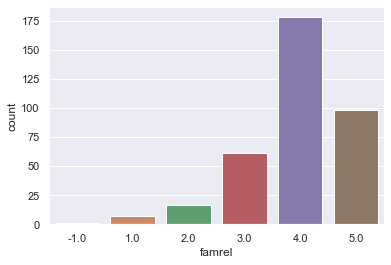

In [84]:
column_info(data.famrel, 'famrel')

Следуя описанию признака, делаем вывод, что значение **-1** является выбросом. Посмотрим сколько их

In [85]:
data.famrel[data.famrel == -1]

25   -1.0
Name: famrel, dtype: float64

Всего одно значение. Возможно это ошибка и вместо **-1** должна быть **1**. Или данные попали из другого столбца. Сделаю предположение, что должна быть **1**

In [86]:
data.famrel = data.famrel.replace({-1:1})

Пропуски заполним медианой

In [87]:
data.famrel.median()

4.0

In [88]:
data.famrel = data.famrel.fillna(4)

## №25 freetime

свободное время после школы (от **1** - очень мало до **5** - очень мого)

count    378.000000
mean       3.222222
std        0.987096
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

Пропущенных значений: 10 
Процент пропущенных данных: 3%


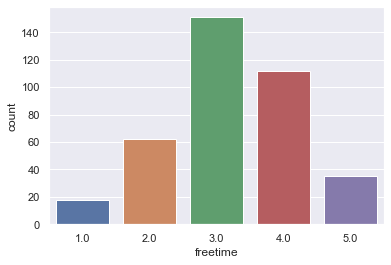

In [89]:
column_info(data.freetime, 'freetime')

Выбросов нет. пропуски заполним медианой

In [90]:
data.freetime.median()

3.0

In [91]:
data.freetime = data.freetime.fillna(3)

## №26 goout

проведение времени с друзьями (от **1** - очень мало до **5** - очень много)

count    380.000000
mean       3.102632
std        1.117146
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

Пропущенных значений: 8 
Процент пропущенных данных: 2%


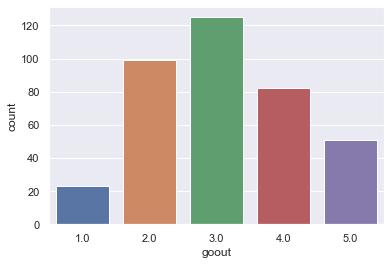

In [92]:
column_info(data.goout, 'goout')

Выбросов нет. Пропуски заполним медианой

In [93]:
data.goout.median()

3.0

In [94]:
data.goout = data.goout.fillna(3)

## №27 health

текущее состояние здоровья (от **1** - очень плохо до **5** - очень хорошо)

count    375.000000
mean       3.533333
std        1.396456
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

Пропущенных значений: 13 
Процент пропущенных данных: 3%


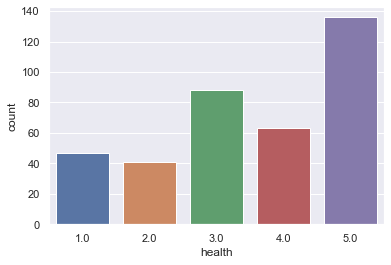

In [95]:
column_info(data.health, 'health')

Выбросов нет. Из графика видно, что ученики у которых все очень хорошо со здоровьем преобладают. Можно заполнить пропуски медианой или преобладающим значением. В данном случае выбиру медиану. При построении модели можно будет вернуться к данном признаку и откорректировать его для получения другого результата

In [96]:
data.health.median()

4.0

In [97]:
data.health = data.health.fillna(4)

## №28 absences

количество пропущенных занятий

count    376.000000
mean       7.335106
std       23.671855
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Пропущенных значений: 12 
Процент пропущенных данных: 3%


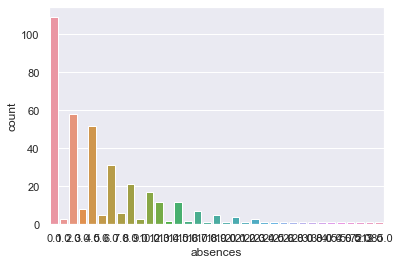

In [98]:
column_info(data.absences, 'absences')

Для данного признака выбранный график не совсем подходит (сложно что-либо разобрать). Построим гисторграмму

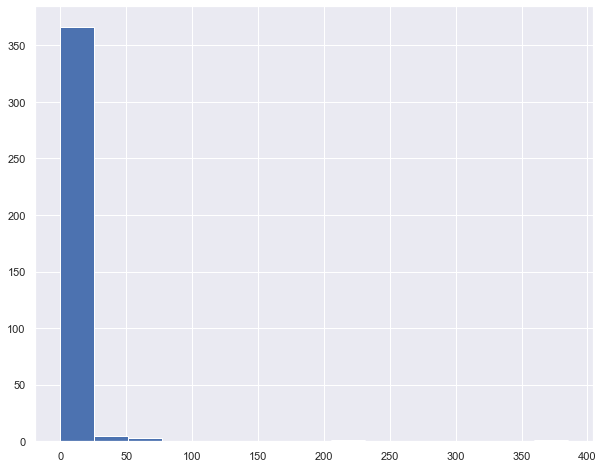

In [99]:
plt.figure(figsize=(10,8))
data.absences.hist(bins=15)

Из графика видно, что в основном данные находятся в диапозоне от **0** до **50**. Но есть данные, находящиеся за пределом этого диапозона

In [100]:
data.absences[data.absences > 50]

74      54.0
183     56.0
222    385.0
276     75.0
390    212.0
Name: absences, dtype: float64

Взглянем на здоровье данных учеников

In [101]:
data.health[data.absences > 50]

74     5.0
183    1.0
222    3.0
276    5.0
390    4.0
Name: health, dtype: float64

Этими данными можно поспекулировать. Из описания датасета не совсем понят, за какой период времени указаны данные. За один год или за период между 15 и 22 годами ученика?

In [102]:
data.age[data.absences > 50]

74     16
183    17
222    16
276    18
390    20
Name: age, dtype: int64

Я имею ввиду следующее: у нас есть ученик, которому **16** лет и у него **54** пропущенных занятия. Это пропуски за один учебный год или за период между 15 и 16 годами (получается 2 учебных года)? В зависимости от того какие это данные, понимать их можно по-разному. Если это данные за 2 года, то они вполне могут быть реальными, так как ученик мог остутствовать по разным причинам (болел или по семейным обстоятельствам). Если за год, то в данном случае такое тоже может быть, но так как данный ученик имеет показатель здоровья **5** (очень хорошо), то возможно это ошибка в данных или ученик прогуливал занятия. Так же он может быть спортсменом (о чем опять свидетельствует показатель здоровья) и выступать от школы на различных соревнованиях. Однозначно дать ответ сложно.

Другой ученик **16** лет имеет **385** пропуска. Это очень много. Возможно он заболел чем-то серьезным и отсутствовал на занятиях больше года. Его показатель здоровья **3** (нормально). Вероятность этих событий существует. Так же существует вероятность, что это просто ошибка в данных.

Так можно рассуждать по каждому ученику. В данном случае я решил удалить все **5** значений. Недостаточно информации об учениках, чтобы точно ответить на вопрос "являются ли это данные выбросами". При построении модели можно будет оценить на сколько данный признак влияет на целевую переменную и попробовать поэксперементировать с этими данными.

In [103]:
for i in data[data.absences > 50].index:
    data = data.drop(i)

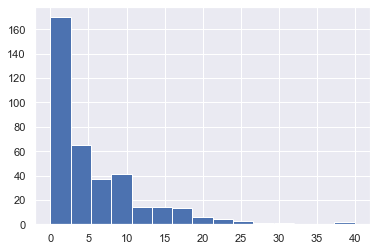

In [104]:
data.absences.hist(bins=15)

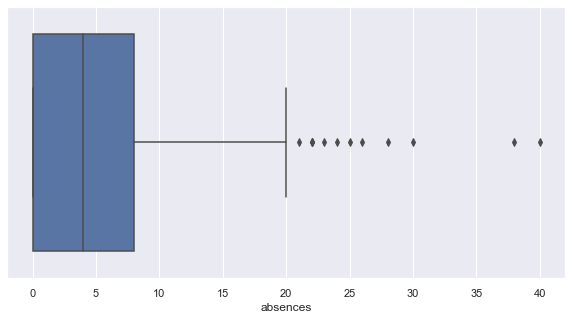

In [105]:
plt.figure(figsize=(10,5))
sns.boxplot(x='absences', data=data)

In [106]:
display(data.absences[data.absences > 20])
display(data.age[data.absences > 20])
display(data.health[data.absences > 20])

40     25.0
103    26.0
198    24.0
205    28.0
216    22.0
260    21.0
277    22.0
280    30.0
307    38.0
313    22.0
315    40.0
320    23.0
Name: absences, dtype: float64

40     16
103    15
198    17
205    17
216    17
260    18
277    18
280    17
307    19
313    19
315    19
320    17
Name: age, dtype: int64

40     3.0
103    2.0
198    2.0
205    5.0
216    1.0
260    2.0
277    3.0
280    5.0
307    4.0
313    1.0
315    3.0
320    5.0
Name: health, dtype: float64

Оставшиеся данные я решил оставить, так как вероятность того, что ученик пропустил чуть больше месяца занятий вполне нормальная (особенно если данные в датасете приведены за весь период обучения между 15 и 22 годами, а не за поcледний учебный год)

Пропуски заполню средним значением. Считаю, что для данного признака это самое лучшее решение, так как обычно ученики хотя бы раз в год болеют.

In [107]:
data.absences.median()

4.0

In [108]:
data.absences = data.absences.fillna(4)

## №29 score

баллы по госэкзамену по математике

count    377.000000
mean      52.307692
std       22.979079
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Пропущенных значений: 6 
Процент пропущенных данных: 2%


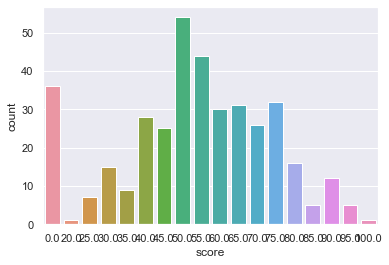

In [109]:
column_info(data.score,'score')

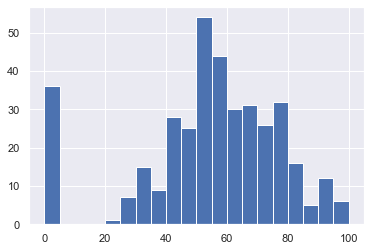

In [110]:
data.score.hist(bins=20)

Так как пропусков всего **6**, а данный признак является нашим таргетом, то не вижу смылса заполнять их. В данном случае просто удалю их. При построении модели можно будет использовать эти данные для предсказания.

In [111]:
for i in data[pd.isnull(data.score)==True].index:
    data = data.drop(i)

Среди данных есть много строк, значения которых равны **0**. Взглянем на несколько признаков вместе с целевой переменной

In [112]:
data.higher[data.score == 0].value_counts()

yes    31
no      5
Name: higher, dtype: int64

Среди учеников есть те, кто не собираеться получать высшее образование. Возможно они не стали заканчивать 11 классов и сдавать госэкзамен по математике.

In [113]:
data.health[data.score==0].value_counts()

5.0    13
4.0     9
3.0     7
2.0     5
1.0     2
Name: health, dtype: int64

Среди учеников есть те, чей показатель здоровья **1** и **2**. Возможно они заболели во время проведения экзамена. Так же заболеть могли и те, у кого показатель здоровья выше, просто вероятность этого меньше.

В целом картина получается немного странная. Есть ученики у которых итоговый бал за экзамен равен **0**. Но в промежутке от **0** до **20** нет ниодного ученика. Возможно у нас просто слишком маленькая выборка, в которую не попали ученики, чья оценка находится в районе от **0** до **20**. Но мне все таки кажется это странным. Я считаю, что **20** это минимальная оценка которую сможет получить любой ученик за экзамен, а те кто получили **0** это форс мажор. Такое достаточно трудно предсказать. Моя рекомендация по этому признаку - просто удалить строчки у которых бал меньше **20**, так как они будет портить точность нашей модели.

In [114]:
for i in data[data.score < 20].index:
    data = data.drop(i)

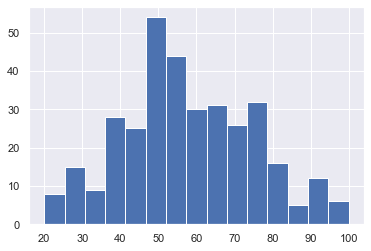

In [115]:
data.score.hist(bins=15)

## №30 studytime granular

Описания к данному признакоу нет

count    334.000000
mean      -6.125749
std        2.543743
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

Пропущенных значений: 7 
Процент пропущенных данных: 2%


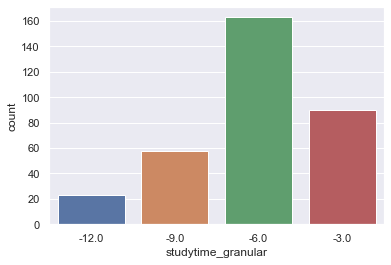

In [116]:
column_info(data.studytime_granular, 'studytime_granular')

Попробуем разделить значения признака **studytime granular** на признак **studytime**

In [117]:
(data.studytime_granular/data.studytime).mean()

-3.0

Среднее значение получаетяс **-3**. Можно сделать вывод что эти призаки линейнозависимы, а следовательно будет сильно скоррелированным между собой. Так как описания к признаку **studytime granular** нет, то я просто удалю этот признак. Однако сначала взгялну на корреляцию, чтобы быть уверенным в своем решении

In [118]:
data.studytime[pd.isnull(data.studytime_granular)==True]

17     2.0
91     2.0
112    2.0
129    2.0
227    2.0
266    2.0
314    2.0
Name: studytime, dtype: float64

In [119]:
data.studytime_granular = data.studytime_granular.fillna(-6)

# Корреляционный анализ числовых переменных

Сделаем корреляционный анализ, чтобы понять какие числовые признаки коррелируют с целевой переменной **score**

In [120]:
data_num = pd.DataFrame()
data.columns
data_num = data.drop(columns=['school', 'sex', 'address', 'famsize', 'pstatus',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health', 'pedu'])

In [121]:
data_num.corr()

,age,studytime,failures,studytime_granular,absences,score
age,1.000000,-0.017881,0.225803,0.017881,0.250375,-0.123925
studytime,-0.017881,1.000000,-0.148078,-1.000000,-0.092650,0.150099
failures,0.225803,-0.148078,1.000000,0.148078,0.204555,-0.290379
studytime_granular,0.017881,-1.000000,0.148078,1.000000,0.092650,-0.150099
absences,0.250375,-0.092650,0.204555,0.092650,1.000000,-0.232756
score,-0.123925,0.150099,-0.290379,-0.150099,-0.232756,1.000000


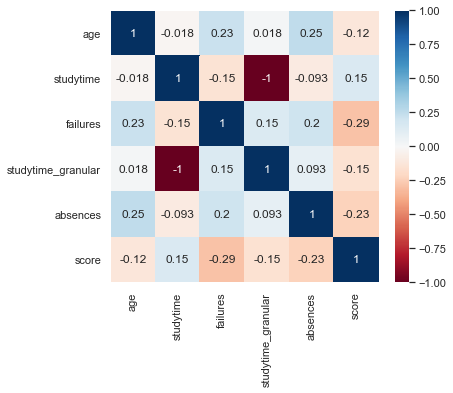

In [122]:
fig = plt.figure(figsize=(6,5))
sns.heatmap(data_num.corr(), annot=True, cmap='RdBu')

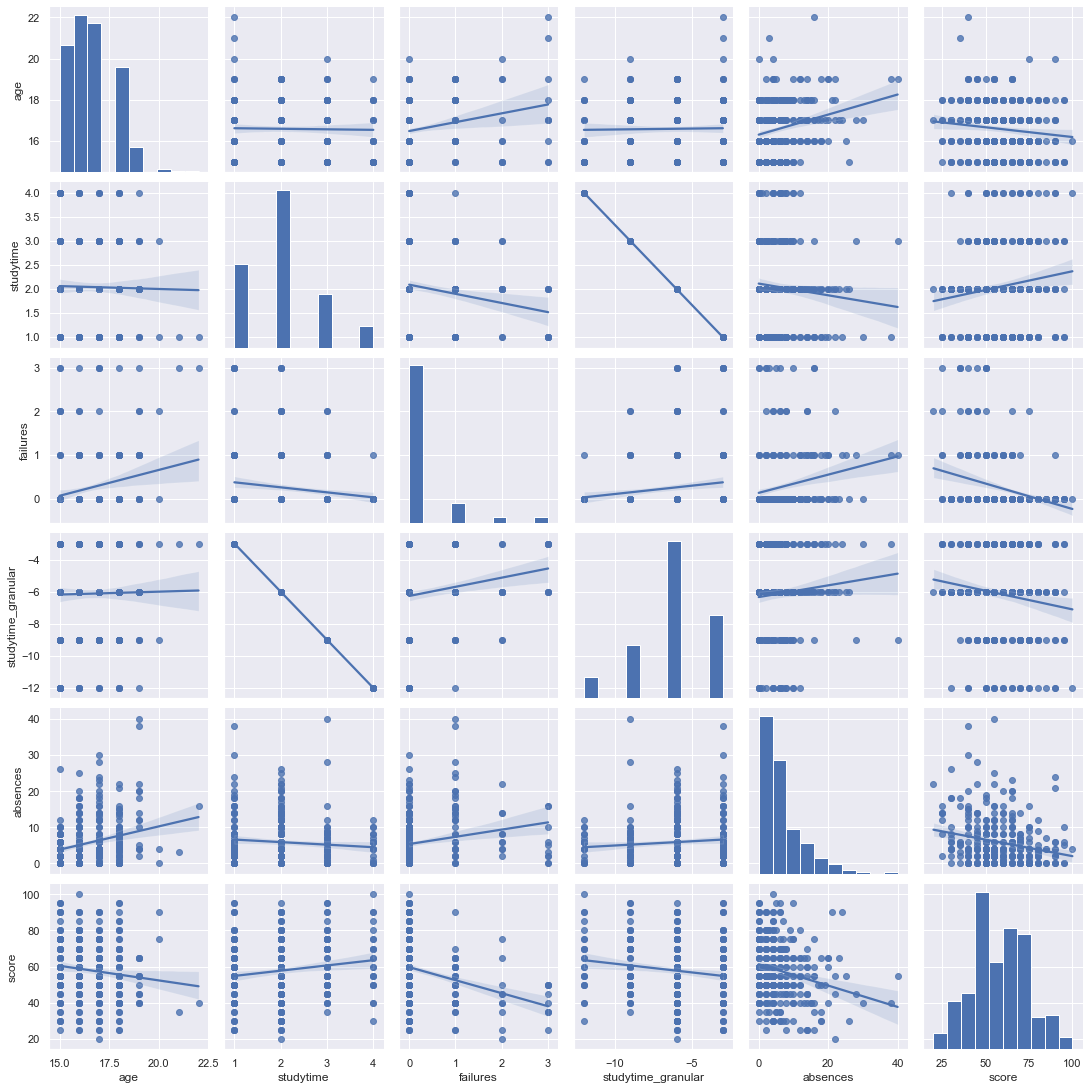

In [123]:
sns.pairplot(data_num, kind='reg')

Да, признаки **studytime** и **studytime_granular** сильно скоррелированы между собой (**-1**). Один из признаков можно удалить. Пусть это будет **studytime_granular**, так как к ниму нет описания

Еще я подумал, что признак **studytime** все таки является категориальным, а не числовым. В корреляционный анализ я его добавил, чтобы убедиться, что он скоррелировам с **studytime_granular**. Поэтому этот признак я так же добавлю в анализ номинативных переменных.

In [124]:
data = data.drop(columns='studytime_granular')

Из оставшихся данных видно, что больше всего между собой скоррелированы признаки **score** и **failures**, причем корреляция отрицательная, т.е. чем меньше внеучебных неудач у ученика тем выше будет его результат тестирования. Так же наблюдается отрицательная корреляция между признаками **score** и **age**, т.е. чем младше учащийся, тем лучше результат. Признаки **score** и **absences** имеют слабую положительную корреляцию, что выглядит немного странно. Получается, что количество пропущенных занятий не сильно влияет на итоговый резльтат и с учетом того, что корреляция положительная получается, что чем больше пропусков тем лучше резльтат.

# Анализ номинативных переменных

Для анализа номинативных переменных воспользуюсь t-критерием. Для тех признаков у которых есть статистическая разница в распределении оценок буду строить boxplot

In [125]:
def nominal_analize(column):
    # Находи все уникальные значения признака
    cols = data[column].value_counts().index
    
    # Составляем все комбинации из списка уникальных значений,
    # рассматриваемого признака.
    all_comb = list(combinations(cols,2))
    
    # Применяем t-тест для всех полученных комбинаций и пытаемся
    # найти статистическую разницу в распределении целевой переменной score.
    # Учитываем поправку Бонферони.
    for comb in all_comb:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], 'score'],
                     data.loc[data.loc[:, column] == comb[1], 'score']).pvalue \
                     <= 0.05/len(all_comb): 
            print('Найдены статистически значимые различия для колонки', column)            
            # Строим boxplot если находим статистическую разницу
            fig, ax = plt.subplots(figsize=(6,5))
            sns.boxplot(x=column, y='score', data=data, ax=ax)
            ax.set_title('Boxplot for '+column)
            plt.show()
            break       

Найдены статистически значимые различия для колонки sex


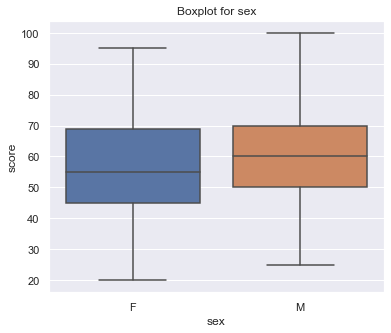

Найдены статистически значимые различия для колонки address


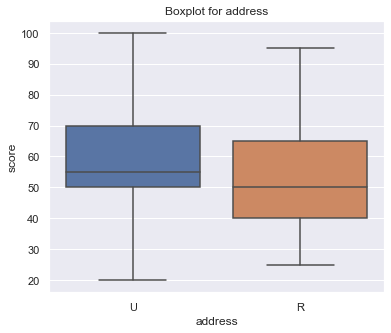

Найдены статистически значимые различия для колонки mjob


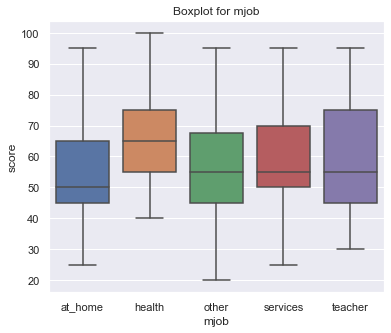

Найдены статистически значимые различия для колонки studytime


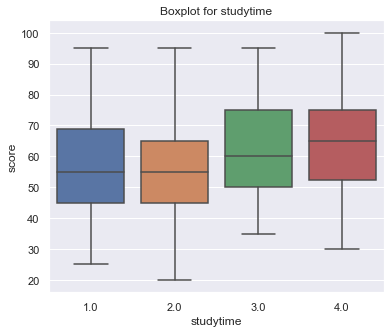

Найдены статистически значимые различия для колонки schoolsup


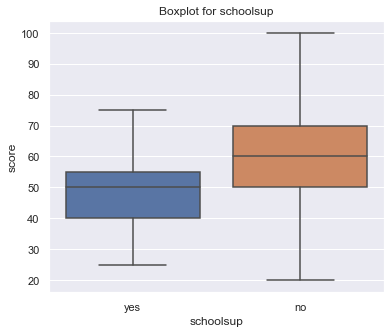

Найдены статистически значимые различия для колонки goout


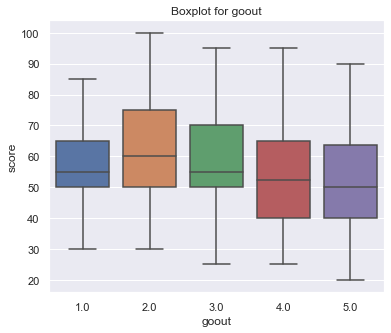

Найдены статистически значимые различия для колонки pedu


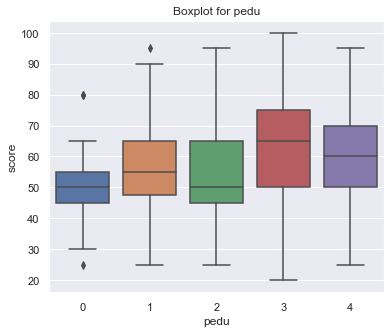

In [126]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
           'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
           'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
           'health','pedu']:
    nominal_analize(col)

Получилось **7** значимых признаков, которые возможно оказывают влияние на итоговую оценку по математике: **sex, address, mjob, schoolsup, higher, romantic, pedu**

Получилось, что признаки у которых не удалось обработать пропуски не влияют на целевую переменную (результат за экзамен по математике), поэтому ими можно пренебреч при построении модели

Объеденим значимые номинативные признаки с числовыми  признаками **(age, failures, absences)**, которые коррелируют с целевой переменной в новый датафрейм

In [127]:
model_data = pd.DataFrame()

In [128]:
model_data = data.drop(columns=['school', 'famsize', 'pstatus',
           'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
           'famsup', 'paid', 'activities', 'nursery', 'internet', 
           'famrel', 'freetime', 'goout', 'health'])

In [129]:
display(model_data.head())
model_data.info()

,sex,age,address,mjob,failures,schoolsup,higher,romantic,absences,score,pedu
0,F,18,U,at_home,0.0,yes,yes,no,6.0,30.0,4
1,F,17,U,at_home,0.0,no,yes,no,4.0,30.0,0
2,F,15,U,at_home,3.0,yes,yes,no,10.0,50.0,0
3,F,15,U,health,0.0,no,yes,yes,2.0,75.0,3
4,F,16,U,other,0.0,no,yes,no,4.0,50.0,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        341 non-null    object 
 1   age        341 non-null    int64  
 2   address    341 non-null    object 
 3   mjob       341 non-null    object 
 4   failures   341 non-null    float64
 5   schoolsup  341 non-null    object 
 6   higher     341 non-null    object 
 7   romantic   341 non-null    object 
 8   absences   341 non-null    float64
 9   score      341 non-null    float64
 10  pedu       341 non-null    int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 42.0+ KB


Для построении модели необходимо, чтобы все признаками были числовыми. Воспользуемся методом `get_dummies()`, чтобы преобразовать категориальные и бинарные признаки

In [130]:
for col in ['sex', 'address', 'mjob', 'schoolsup', 'higher', 'romantic', 'pedu']:
    model_data = model_data.join(pd.get_dummies(data[col], prefix=col))
    model_data = model_data.drop(columns=[col])

In [131]:
display(model_data.head())
model_data.info()

,age,failures,absences,score,sex_F,sex_M,address_R,address_U,mjob_at_home,mjob_health,mjob_other,mjob_services,mjob_teacher,schoolsup_no,schoolsup_yes,higher_no,higher_yes,romantic_no,romantic_yes,pedu_0,pedu_1,pedu_2,pedu_3,pedu_4
0,18,0.0,6.0,30.0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1
1,17,0.0,4.0,30.0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0
2,15,3.0,10.0,50.0,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0
3,15,0.0,2.0,75.0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
4,16,0.0,4.0,50.0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 394
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            341 non-null    int64  
 1   failures       341 non-null    float64
 2   absences       341 non-null    float64
 3   score          341 non-null    float64
 4   sex_F          341 non-null    uint8  
 5   sex_M          341 non-null    uint8  
 6   address_R      341 non-null    uint8  
 7   address_U      341 non-null    uint8  
 8   mjob_at_home   341 non-null    uint8  
 9   mjob_health    341 non-null    uint8  
 10  mjob_other     341 non-null    uint8  
 11  mjob_services  341 non-null    uint8  
 12  mjob_teacher   341 non-null    uint8  
 13  schoolsup_no   341 non-null    uint8  
 14  schoolsup_yes  341 non-null    uint8  
 15  higher_no      341 non-null    uint8  
 16  higher_yes     341 non-null    uint8  
 17  romantic_no    341 non-null    uint8  
 18  romantic_y

# Выводы о данных

В результате проведенного анализа данных я делаю следующие выводы:

* В данных достаточно много пропусков. В некоторых признаках пропуски больше **10%** от общего объема. Не все пропуски удалось обработать. Для этого не хватает информации. Я все же старлся максимально обрабатывать пропуски, где это возможно. Датасет небольшой (всего 395 строк), поэтому удалять все подряд плохая идея.


* Выбросов практически нет. Всего в нескольких признаках. Это говорит о том, что данные достаточно чистые.


* Числовых признаков получилось немного. Всего три. **failures, age , absences**. Отрицательная корреляция **age** говорит о том, что чем меньше возраст учащегося, тем лучше его результат, что странно. Так же наблюдается очень слабая положительная корреляция с признаком **absences**, которая говорит нам о том, что чем больше пропущено занятий, тем лучше результат, что тоже страно. Но так как корреляция очень слабая, то в целом этим признаком можно пренебреч при построении модели. С оставшимся признаком **failure** все хорошо. У него наблюдается умеренная отрицательная корреляция, что говорит нам о том, что чем меньше внеучебных неудач, тем лучше итоговый результат учащегося, что выглядит логично.


* Анализ номинативных данных показал, что значимые для построения модели следующие признаки: **sex, address, mjob, schoolsup, higher, romantic, pedu**